In [6]:
from stock_data import StockData
from features import IndicatorsFeaturesList
from features import FeatureFactory
from targets import ClosePriceTargetFunction
from models import GBMRegressionModel
from stock_data import StockDataSampler

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [7]:
stock_data = StockData(ticker="AAPL", data_path="data\AAPL.csv")
stock_data = FeatureFactory.preprocess(stock_data, IndicatorsFeaturesList())

target = ClosePriceTarget(stock_data, 10)

TEST_RATIo
sampler = SimpleStockDataSampler()

In [8]:
sampler.sample(stock_data, target)

(array([[1.30380005e+02, 1.33570007e+02, 2.76531450e+07, ...,
                    nan,            nan,            nan],
        [1.29399994e+02, 1.31054993e+02, 2.01340550e+07, ...,
                    nan,            nan,            nan],
        [1.26760002e+02, 1.29889893e+02, 2.36942100e+07, ...,
                    nan,            nan,            nan],
        ...,
        [1.35009995e+02, 1.35360001e+02, 7.36310300e+06, ...,
         2.59760427e-02, 2.55241846e+00, 2.65332699e+00],
        [1.33169998e+02, 1.34352005e+02, 7.98710900e+06, ...,
         7.10851886e-01, 1.93786086e+00, 2.56806090e+00],
        [1.33449997e+02, 1.33449997e+02, 0.00000000e+00, ...,
         1.16064447e+00, 1.38697508e+00, 2.54087728e+00]]),
 array([130.04499817, 131.11000061, 130.83000183, ...,          nan,
                 nan,          nan]))

In [3]:
data = stock_data[:pd.Timestamp("2022-02-04")].get()

In [5]:
close_target = ClosePriceTarget(10)

target = close_target.calculate(stock_data)

In [6]:
target

date
2021-01-04 14:30:00    130.044998
2021-01-04 15:30:00    131.110001
2021-01-04 16:30:00    130.830002
2021-01-04 17:30:00    130.949997
2021-01-04 18:30:00    128.950104
                          ...    
2022-12-21 18:30:00           NaN
2022-12-21 19:30:00           NaN
2022-12-21 20:30:00           NaN
2022-12-22 14:30:00           NaN
2022-12-22 14:57:38           NaN
Name: close_target_10_bars, Length: 3475, dtype: float64

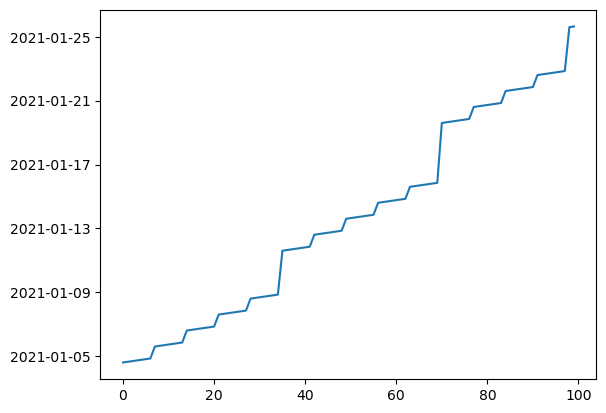

In [16]:
plt.plot(np.arange(len(dates[:100])), dates[:100])

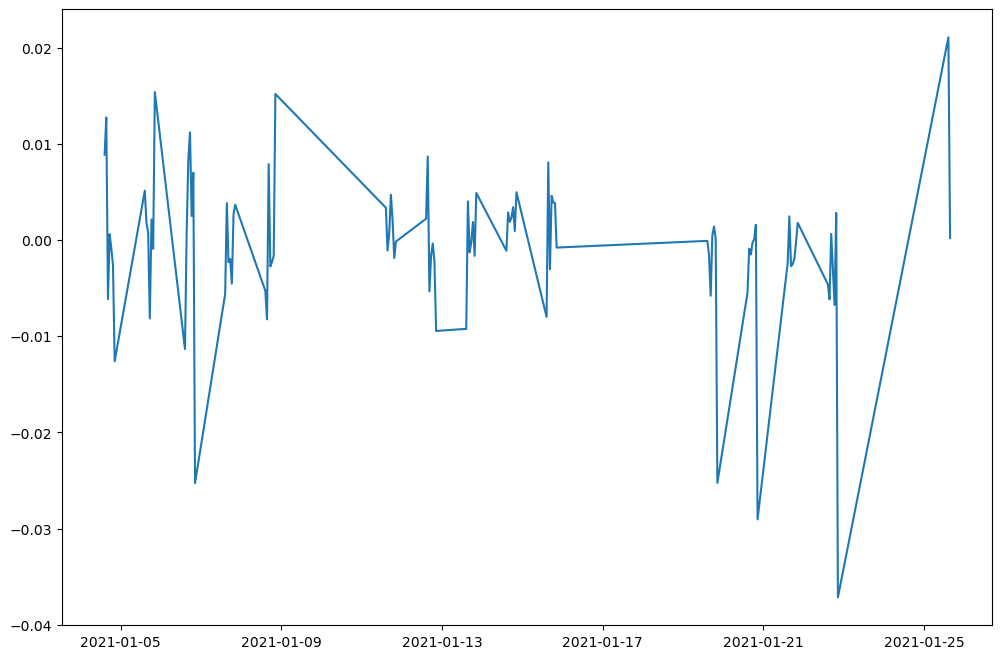

In [13]:
close = stock_data.get("close")
dates = stock_data.get_dates()

plt.figure(figsize=(12, 8))

plt.plot(dates[:100], np.log(close / close.shift(-1))[:100])

plt.show()

date
2021-01-04 14:30:00    0.026067
2021-01-04 15:30:00    0.010985
2021-01-04 16:30:00   -0.004199
2021-01-04 17:30:00    0.000616
2021-01-04 18:30:00    0.003335
                         ...   
2022-12-21 18:30:00    0.002437
2022-12-21 19:30:00   -0.004217
2022-12-21 20:30:00    0.020659
2022-12-22 14:30:00   -0.000121
2022-12-22 14:57:26         NaN
Name: close, Length: 3475, dtype: float64

In [5]:
indicators_features = IndicatorsFeaturesList()
FeatureFactory.preprocess(stock_data, indicators_features)

In [6]:
stock_data[pd.Timestamp("2021-02-04"):pd.Timestamp("2022-02-04")]

,low,open,volume,high,close,close_5_mean,close_10_mean,close_20_mean,close_5_var,close_10_var,close_20_var
date,,,,,,,,,,,
2021-04-01,68.699997,70.839996,2120400,71.169998,69.750000,68.908000,68.335000,68.846500,9.916702e-01,1.157605e+00,1.436951e+00
2021-05-01,69.470001,69.559998,2217200,72.949997,72.160004,69.700002,68.624001,69.052000,2.726152e+00,2.593297e+00,1.936966e+00
2021-06-01,69.500000,70.599998,2272400,71.120003,70.110001,70.220001,68.926001,69.157500,1.231153e+00,2.475850e+00,1.925916e+00
2021-07-01,68.760002,70.269997,1222300,71.000000,70.900002,70.500002,69.305001,69.254000,1.119152e+00,2.382785e+00,2.074069e+00
2021-08-01,70.099998,71.650002,1774700,72.029999,70.900002,70.764001,69.626001,69.347501,8.604326e-01,2.261162e+00,2.204822e+00
...,...,...,...,...,...,...,...,...,...,...,...
2022-01-04,18.940001,18.940001,0,18.940001,18.940001,18.940001,18.940001,18.940001,1.637579e-13,-1.050024e-11,7.279522e-12
2022-01-06,18.940001,18.940001,0,18.940001,18.940001,18.940001,18.940001,18.940001,1.637579e-13,-1.050024e-11,7.279522e-12
2022-01-07,18.940001,18.940001,0,18.940001,18.940001,18.940001,18.940001,18.940001,1.637579e-13,-1.050024e-11,7.279522e-12


In [8]:
close = stock_data.get_column("close")

In [12]:
display(close)
display(close.shift(-5))

date
2011-05-24    38.840000
2011-05-25    35.000000
2011-05-26    34.770000
2011-05-27    34.450001
2011-05-31    33.450001
                ...    
2022-10-17    18.940001
2022-10-18    18.940001
2022-10-19    18.940001
2022-10-20    18.940001
2022-10-21    18.940001
Name: close, Length: 2874, dtype: float64

date
2011-05-24    32.25
2011-05-25    33.52
2011-05-26    33.50
2011-05-27    34.23
2011-05-31    35.00
              ...  
2022-10-17      NaN
2022-10-18      NaN
2022-10-19      NaN
2022-10-20      NaN
2022-10-21      NaN
Name: close, Length: 2874, dtype: float64

In [14]:
delta = pd.Timestamp('2022-01-01') - pd.Timestamp('2020-01-01')
delta

Timedelta('731 days 00:00:00')

In [17]:
pd.Timestamp('2020-01-01') + delta / 2

Timestamp('2020-12-31 12:00:00')